<a href="https://colab.research.google.com/github/EnriqueBenny/CSE450/blob/main/Group1_Unit1_CSE450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary for the Banking dataset

We run campaigns periodically. In each campaign, we select a random set of customers, some of which we have already contacted in a previous campaign.

This dataset contains a random set of customers we'd like to target. Some of them have been contacted previously, others haven't been. You can tell how long its been since they were contacted by looking at the "pdays" field and the number of times we've contacted them before by looking at the "previous" field. The "poutcome" field will tell you whether or not the last contact resulted in a successful outcome.

We also have some information about the general economic conditions of the country at the time we last contacted each customer in the sample.


## bank client data:

age (numeric)

job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")

housing: has housing loan? (categorical: "no","yes","unknown")

loan: has personal loan? (categorical: "no","yes","unknown")

## related with the last contact of the current campaign:

contact: contact communication type (categorical: "cellular","telephone")

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

## other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

## social and economic context attributes

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

y - has the client subscribed a term deposit? (binary: "yes","no")

## Missing Attribute Values

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [ ]:
import pandas as pd
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

There are no non-null rows. I attempted a dropna() test to see if there were any rows that would be removes, but it seems that there are no instances of NA.

In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
campaign['poutcome'].value_counts()

poutcome
nonexistent    31988
failure         3843
success         1238
Name: count, dtype: int64

# DATA SCIENCE METHODS
## MIGUEL FERREIRA, BANK PRESIDENT ASKS:
The core task we're interested in is identifying those customers most likely to subscribe to a term deposit.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. In this case, our financial institution.

I don't know a lot about data science, but I've been trying to get up to speed. Do you think a supervised or unsupervised approach would work best for this situation?

**Response**

A Supervised approach would be for the best. We can use your old data to create predictions on who subscribed in the past.

# TRAIN TEST SPLIT
## BEATRIZ, SENIOR DATA SCIENTIST ASKS:
Miguel, that is a great question.

While we are asking detailed questions, the dataset has approximately 37,000 records. How much of that data will you use to train your model?

-------
Based on your initial analysis of the data, your team feels:

1. A simple 80/20 split will provide us with enough to accurately train and test our model.
2. A 50/50 split so that we have the same amount of training data as testing.
3. We will pull out 1,000 records for our test dataset and use the other 36,000 for training. This gives our model more to train on and will produce better results.
4. We will use all 37,000 for training and use cross-validation to evaluate the model.

**Response**

We feel that using a cross validation method would be the best option for this dataset.

# ADDITIONAL INSIGHTS
## FRANCISCO, VP OF MARKETING ASKS:
Aside from the core marketing question Miguel mentioned, I'm wondering if there are other insights we could gain from our data.

I can look at the data and tell that some days of the week or some months produce better results than others.

I'm wondering if it's possible for us to see if those results are true for all customers, or if some types of customers respond better on certain days than others?

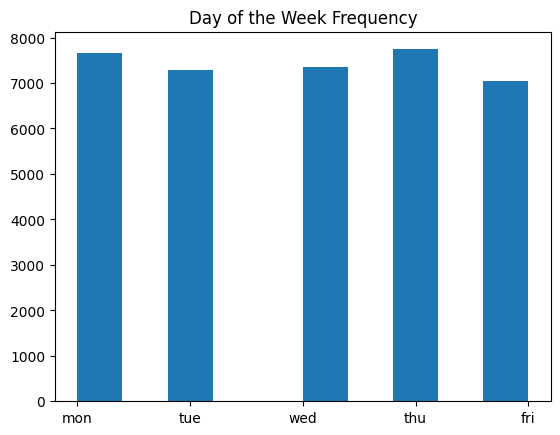

In [ ]:
import matplotlib.pyplot as plt

plt.hist(campaign['day_of_week'])
plt.title('Day of the Week Frequency')
plt.show()

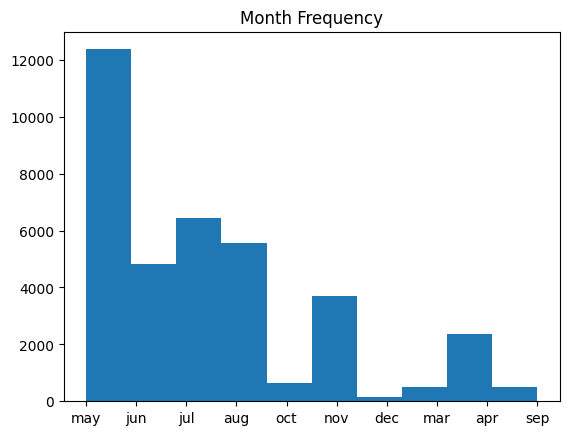

In [ ]:
plt.hist(campaign['month'])
plt.title('Month Frequency')
plt.show()

# DATA PRIVACY LAWS
## BEATRIZ, SENIOR DATA SCIENTIST ASKS:
Since we're operating in the European Union, we're subject to GDPR compliance requirements.

What do you think we might need to do for this project in order to be compliant with GDPR regulations?

-----
Based on your initial analysis of the data, your team feels:

1. This is historic data, so we should be just fine.
2. This is anonymous data, so we should be just fine.
3. The GDPR doesn't apply in this situation, since we're just building a model, not selling data.
4.
In order to use this data under GDPR, we'll need to get consent from the customers in the dataset.

**Response**

I'm not used to reading leagaleze, but as long as the data is anonymous we should be fine.


https://gdpr-info.eu/art-6-gdpr/

In [ ]:
print("test")